In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import datetime
import calendar
import folium
from folium import plugins
import numpy as np
import seaborn as sns

%matplotlib inline

In [2]:
june_trip = pd.read_csv('data/june_trip.csv')
june_trip.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
0,2019-06-01 00:05:46.817000,Bird,BRD3572,PoweredSPI1T,4.0,328.084000,2019-06-01 00:00:00,00:02:18.203333,2019-06-01 00:00:00,00:06:16.406666,36.164400,-86.78070,36.163600,-86.780200,"[[36.164679,-86.781089],[36.163693,-86.78011],...",2019-06-02 05:30:19.960000
1,2019-06-01 00:05:46.817000,Bird,BRD3571,Powered2I3MS,5.0,4921.260000,2019-06-01 00:00:00,00:02:44.803333,2019-06-01 00:00:00,00:07:28.286666,36.175300,-86.79430,36.175300,-86.794300,"[[36.175367,-86.794232],[36.175367,-86.794232]...",2019-06-02 05:30:19.927000
2,2019-06-01 00:09:54,Gotcha,GOT1,Powered327,12.0,12.426575,2019-06-01 00:00:00,00:09:56,2019-06-01 00:00:00,00:21:56,36.161501,-86.77601,36.152529,-86.783742,"[[""36.16149"",""-86.77605000000001""]]",2019-06-06 22:23:08.673000
3,2019-06-01 00:10:46.957000,Bird,BRD3610,Powered8U1A6,2.0,0.000000,2019-06-01 00:00:00,00:10:31.163333,2019-06-01 00:00:00,00:12:02.773333,36.164000,-86.78070,36.163100,-86.779700,"[[36.163168,-86.779639]]",2019-06-02 05:30:20.283000
4,2019-06-01 00:10:46.957000,Bird,BRD3612,PoweredSPI1T,5.0,656.168000,2019-06-01 00:00:00,00:07:21.430000,2019-06-01 00:00:00,00:12:30.913333,36.165000,-86.77990,36.165900,-86.777800,"[[36.164951,-86.779836],[36.16494,-86.779456],...",2019-06-02 05:30:20.347000


In [3]:
june_trip.shape

(205627, 16)

In [44]:
june_trip.tripDuration.value_counts()

4.000000     5352
5.000000     5012
3.000000     4666
6.000000     4615
7.000000     4243
             ... 
5.751467        1
27.186950       1
22.386867       1
2.763817        1
13.811183       1
Name: tripDuration, Length: 47033, dtype: int64

In [34]:
june_trip.companyName.value_counts()

Lime             84728
Bird             55014
Lyft             37821
SPIN             14294
Bolt Mobility    10219
Gotcha            1803
JUMP              1748
Name: companyName, dtype: int64

In [47]:
june_trip.iloc[:,1:5].groupby(['companyName','tripDuration']).count()



tripRecordNum  sumdID
companyName tripDuration                       
Bird        0.0                    1501    1501
            1.0                    1865    1865
            2.0                    2865    2865
            3.0                    3569    3569
            4.0                    4037    4037
...                                 ...     ...
SPIN        3075.0                    1       1
            3269.0                    1       1
            4885.0                    1       1
            5007.0                    1       1
            7500.0                    1       1

[47783 rows x 2 columns]

In [4]:
june_trip.sumdID.value_counts()

Poweredb671ffe4-2bca-5880-98ec-d36f65aa11a2    1308
PoweredUNKNOWN                                 1120
PoweredSQWMJWTIGM6DS                            158
PoweredOQ3DRY64KZBYS                            158
Powered3ZPCHCTLNK2WR                            144
                                               ... 
PoweredP4793                                      1
Powered1596b61a-225f-5a94-9027-cfc92d1075a0       1
Powered42faf523-5d2b-526a-9b38-e6d583b6e345       1
Powered819158                                     1
Powered4ZVHJW6PIHR4I                              1
Name: sumdID, Length: 6742, dtype: int64

In [5]:
unknownscooter=june_trip.loc[june_trip.sumdID=='PoweredUNKNOWN']
unknownscooter


,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
43,2019-06-01 00:25:47.827000,Bird,BRD3705,PoweredUNKNOWN,0.0,0.0,2019-06-01 00:00:00,00:27:11.406666,2019-06-01 00:00:00,00:27:21.493333,36.1449,-86.8093,36.1449,-86.8093,[],2019-06-02 05:30:21.813000
47,2019-06-01 00:25:47.827000,Bird,BRD3704,PoweredUNKNOWN,0.0,0.0,2019-06-01 00:00:00,00:27:29.580000,2019-06-01 00:00:00,00:27:39.063333,36.1449,-86.8093,36.1449,-86.8093,[],2019-06-02 05:30:21.783000
69,2019-06-01 00:30:47.943000,Bird,BRD3737,PoweredUNKNOWN,0.0,0.0,2019-06-01 00:00:00,00:32:15.626666,2019-06-01 00:00:00,00:32:25.553333,36.1590,-86.7757,36.1590,-86.7757,[],2019-06-02 05:30:22.403000
110,2019-06-01 00:40:48.323000,Bird,BRD3800,PoweredUNKNOWN,1.0,0.0,2019-06-01 00:00:00,00:40:11.770000,2019-06-01 00:00:00,00:40:50.926666,36.1237,-86.7896,36.1237,-86.7896,[],2019-06-02 05:30:24.033000
114,2019-06-01 00:40:48.323000,Bird,BRD3799,PoweredUNKNOWN,0.0,0.0,2019-06-01 00:00:00,00:42:33.976666,2019-06-01 00:00:00,00:42:47.656666,36.1777,-86.7504,36.1777,-86.7504,[],2019-06-02 05:30:24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202850,2019-06-30 19:12:38.750000,Bird,BRD2521,PoweredUNKNOWN,0.0,0.0,2019-06-30 00:00:00,19:13:12.006666,2019-06-30 00:00:00,19:13:14.243333,36.1584,-86.7681,36.1584,-86.7681,[],2019-07-01 05:32:04.727000
203688,2019-06-30 20:42:42.467000,Bird,BRD3417,PoweredUNKNOWN,0.0,0.0,2019-06-30 00:00:00,20:42:52.810000,2019-06-30 00:00:00,20:43:15.723333,36.1459,-86.8120,36.1459,-86.8120,[],2019-07-01 05:32:17.493000
204168,2019-06-30 21:37:45.190000,Bird,BRD3910,PoweredUNKNOWN,2.0,0.0,2019-06-30 00:00:00,21:37:39.883333,2019-06-30 00:00:00,21:39:24.596666,36.1637,-86.7700,36.1637,-86.7700,[],2019-07-01 05:32:24.190000
204995,2019-06-30 22:57:49.077000,Bird,BRD4605,PoweredUNKNOWN,0.0,0.0,2019-06-30 00:00:00,22:57:58,2019-06-30 00:00:00,22:58:20.966666,36.1559,-86.7743,36.1559,-86.7743,[],2019-07-01 05:32:33.680000


In [6]:
unknownscooter.companyName.value_counts()

Bird    1120
Name: companyName, dtype: int64

In [49]:
unknownscooter.tripDuration.value_counts()

0.0     806
1.0     198
2.0      47
5.0      14
4.0      12
3.0      12
11.0      4
6.0       4
10.0      4
8.0       3
9.0       3
7.0       3
13.0      3
15.0      3
12.0      1
20.0      1
23.0      1
16.0      1
Name: tripDuration, dtype: int64

In [50]:
unknownscooter.tripDistance.value_counts()

0.000       1102
656.168        6
1312.336       2
5905.512       1
5577.428       1
984.252        1
4921.260       1
1968.504       1
4265.092       1
3280.840       1
5249.344       1
3937.008       1
328.084        1
Name: tripDistance, dtype: int64

In [73]:
unknown=unknownscooter.loc[unknownscooter['tripDistance'].isin([656.168,5905.512,5577.428,1968.504,1312.336,328.084,5249.344,4265.092,984.252,3937.008,3280.840])]
unknown

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
10828,2019-06-01 23:01:51.977000,Bird,BRD5071,PoweredUNKNOWN,0.0,5905.512,2019-06-01 00:00:00,23:03:04.770000,2019-06-01 00:00:00,23:03:18.260000,36.1630,-86.7803,36.1630,-86.7803,[],2019-06-02 05:32:05.013000
31735,2019-06-04 15:29:50.757000,Bird,BRD412,PoweredUNKNOWN,1.0,656.168,2019-06-04 00:00:00,15:30:17.546666,2019-06-04 00:00:00,15:31:26.366666,36.1361,-86.7920,36.1361,-86.7920,[],2019-06-05 05:31:10.730000
51699,2019-06-07 19:58:15.613000,Bird,BRD1670,PoweredUNKNOWN,0.0,1312.336,2019-06-07 00:00:00,19:59:27.046666,2019-06-07 00:00:00,19:59:43.540000,36.1751,-86.7834,36.1750,-86.7834,[],2019-06-08 05:31:19.667000
66643,2019-06-08 23:09:30.880000,Bird,BRD7823,PoweredUNKNOWN,23.0,984.252,2019-06-08 00:00:00,22:47:28.190000,2019-06-08 00:00:00,23:10:01.216666,36.1584,-86.7908,36.1584,-86.7908,[],2019-06-09 05:32:55.617000
67827,2019-06-09 00:34:34.613000,Bird,BRD8916,PoweredUNKNOWN,0.0,656.168,2019-06-09 00:00:00,00:36:14.520000,2019-06-09 00:00:00,00:36:24.543333,36.1527,-86.8048,36.1526,-86.8047,[],2019-06-10 05:30:21.133000
67898,2019-06-09 00:44:34.850000,Bird,BRD9067,PoweredUNKNOWN,1.0,328.084,2019-06-09 00:00:00,00:44:32.200000,2019-06-09 00:00:00,00:45:05.456666,36.1611,-86.7809,36.1611,-86.7809,[],2019-06-10 05:30:22.870000
70205,2019-06-09 04:49:44.777000,Bird,BRD11039,PoweredUNKNOWN,11.0,656.168,2019-06-09 00:00:00,04:38:43.616666,2019-06-09 00:00:00,04:50:10.890000,36.1581,-86.7890,36.1581,-86.7890,[],2019-06-10 05:31:08.377000
80981,2019-06-10 17:56:26.573000,Bird,BRD1114,PoweredUNKNOWN,2.0,656.168,2019-06-10 00:00:00,17:56:18.610000,2019-06-10 00:00:00,17:57:55.850000,36.1646,-86.7788,36.1646,-86.7788,[],2019-06-11 05:31:13.370000
109228,2019-06-15 02:16:03.907000,Bird,BRD5784,PoweredUNKNOWN,4.0,4265.092,2019-06-15 00:00:00,02:12:37.320000,2019-06-15 00:00:00,02:16:50.850000,36.1623,-86.7746,36.1694,-86.7785,[],2019-06-16 05:30:54.147000
109260,2019-06-15 02:21:04.077000,Bird,BRD5833,PoweredUNKNOWN,4.0,5249.344,2019-06-15 00:00:00,02:17:30.580000,2019-06-15 00:00:00,02:21:28.540000,36.1754,-86.7851,36.1627,-86.7766,[],2019-06-16 05:30:54.693000


In [ ]:
plt.figure(figsize = (10, 8))
sns.set(style="whitegrid")
plt.hist(unknown.tripRecordNum,bins=20,color='red',edgecolor='white')
plt.title('')
plt.show()

In [55]:
unknownscooter.tripRecordNum.value_counts()

BRD2912    3
BRD4965    3
BRD3250    2
BRD3417    2
BRD5305    2
          ..
BRD1685    1
BRD4225    1
BRD7699    1
BRD1264    1
BRD7696    1
Name: tripRecordNum, Length: 1057, dtype: int64

In [ ]:
##june_trip.iloc[1:2].groupby('', as_index=False).count()


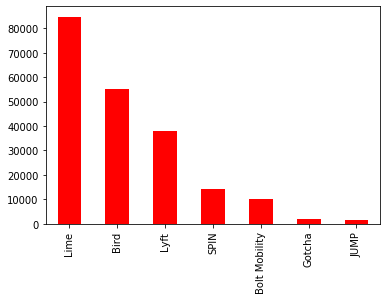

In [7]:
june_trip.companyName.value_counts().plot(kind = 'bar',color='red')

In [8]:
june_trip.tripRecordNum.value_counts()

BOL00048     30
BOL00135     30
BOL00063     30
BOL00087     30
BOL00123     30
             ..
BRD7498       1
LIM5489       1
LIM784259     1
LIM781716     1
LIM784032     1
Name: tripRecordNum, Length: 27053, dtype: int64

In [17]:
june_trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205627 entries, 0 to 205626
Data columns (total 16 columns):
pubTimeStamp      205627 non-null datetime64[ns]
companyName       205627 non-null object
tripRecordNum     205627 non-null object
sumdID            205627 non-null object
tripDuration      205627 non-null float64
tripDistance      205627 non-null float64
startDate         205627 non-null datetime64[ns]
startTime         205627 non-null datetime64[ns]
endDate           205627 non-null datetime64[ns]
endTime           205627 non-null datetime64[ns]
startLatitude     205627 non-null float64
startLongitude    205627 non-null float64
endLatitude       205627 non-null float64
endLongitude      205627 non-null float64
tripRoute         205627 non-null object
create_dt         205627 non-null object
dtypes: datetime64[ns](5), float64(6), object(5)
memory usage: 25.1+ MB


In [10]:
##Average trip distance covered by each scooter
june_trip.groupby('sumdID').tripDistance.mean()

sumdID
Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619    9506.781026
Powered-01a24436-0315-e1bb-7ce0-d081d05dff7d    7346.683846
Powered-03be23ca-d43b-222f-be54-e44b5b4690df    6044.813514
Powered-046201fb-6532-1f37-6334-3612fb1e61f7    5536.551081
Powered-0479bb84-afbd-0426-f1c4-df628542a88c    5709.465306
                                                   ...     
Poweredff2ad591-70e4-579d-9714-b80a5ce83976      950.400000
Poweredff356f94-2252-5432-b484-ad9679bf4b8d     7550.400000
Poweredff8a28ab-0ffb-59ce-9b1e-2d1299a25634     3092.571429
Poweredffcc1b11-af95-5e06-b002-82ffb342aae8     5174.400000
StandardLIRPOZ7X3ZVGO                              0.000000
Name: tripDistance, Length: 6742, dtype: float64

In [11]:
##Average ride time for each scooter
june_trip.groupby('sumdID').tripDuration.mean()

sumdID
Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619    1478.205128
Powered-01a24436-0315-e1bb-7ce0-d081d05dff7d    1286.115385
Powered-03be23ca-d43b-222f-be54-e44b5b4690df     922.621622
Powered-046201fb-6532-1f37-6334-3612fb1e61f7     901.864865
Powered-0479bb84-afbd-0426-f1c4-df628542a88c    1058.571429
                                                   ...     
Poweredff2ad591-70e4-579d-9714-b80a5ce83976        4.432583
Poweredff356f94-2252-5432-b484-ad9679bf4b8d       30.942608
Poweredff8a28ab-0ffb-59ce-9b1e-2d1299a25634       11.121371
Poweredffcc1b11-af95-5e06-b002-82ffb342aae8      294.730400
StandardLIRPOZ7X3ZVGO                              5.133333
Name: tripDuration, Length: 6742, dtype: float64

In [12]:
june_trip['pubTimeStamp']=pd.to_datetime(june_trip.pubTimeStamp)

In [13]:
june_trip['startDate']=pd.to_datetime(june_trip.startDate)

In [14]:
june_trip['endDate']=pd.to_datetime(june_trip.endDate)

In [15]:
june_trip['startTime']=pd.to_datetime(june_trip.startTime)

In [16]:
june_trip['endTime']=pd.to_datetime(june_trip.endTime)

Text(0, 0.5, 'Number of scooters')

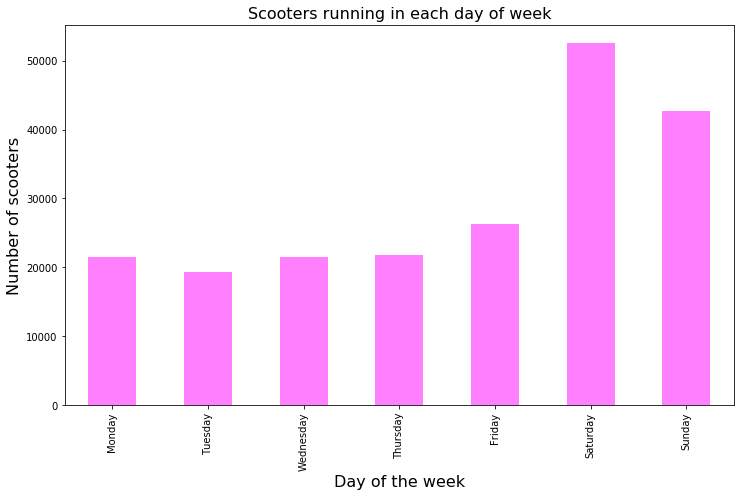

In [18]:
scooters_day = june_trip.groupby(june_trip['startDate'].dt.dayofweek).count().startDate

# Replace the day integers by day names.
scooters_day.index=[calendar.day_name[x] for x in range(0,7)]

# plot scooters per day
scooters_day.plot(kind='bar',figsize=(12,7), color='magenta', alpha=0.5)

# title and x,y labels
plt.title('Scooters running in each day of week', fontsize=16)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of scooters',fontsize=16)

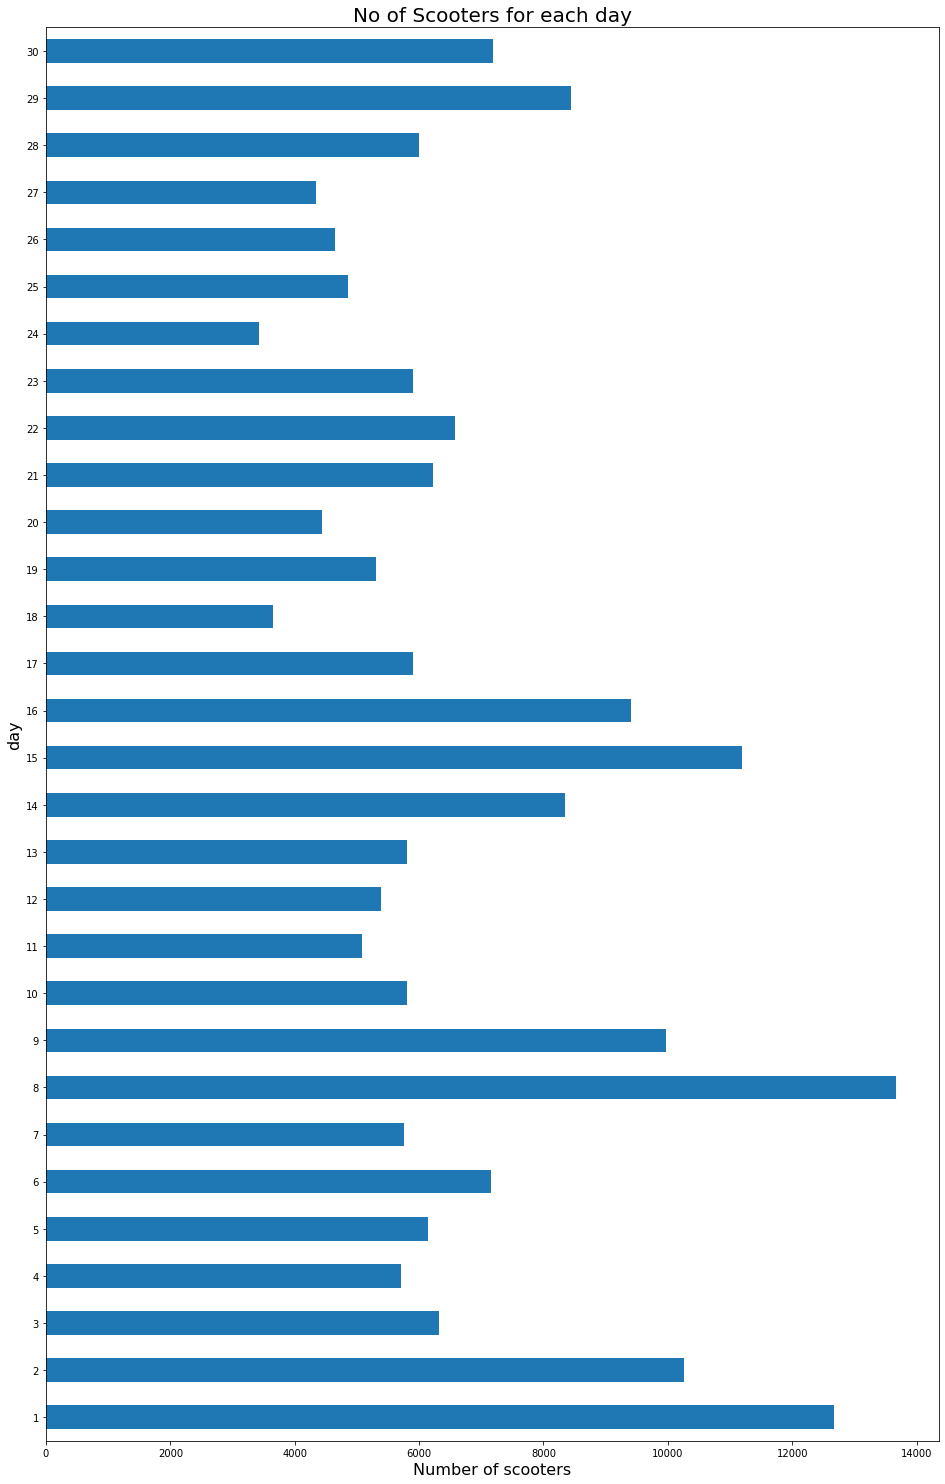

In [19]:
scooters =june_trip.groupby(june_trip['startDate'].dt.day).count().startDate

scooters.plot(kind='barh', figsize=(16,26))

# title and x,y labels
plt.title('No of Scooters for each day',fontsize=20)
plt.xlabel('Number of scooters',fontsize=16)
plt.ylabel('day',fontsize=16);

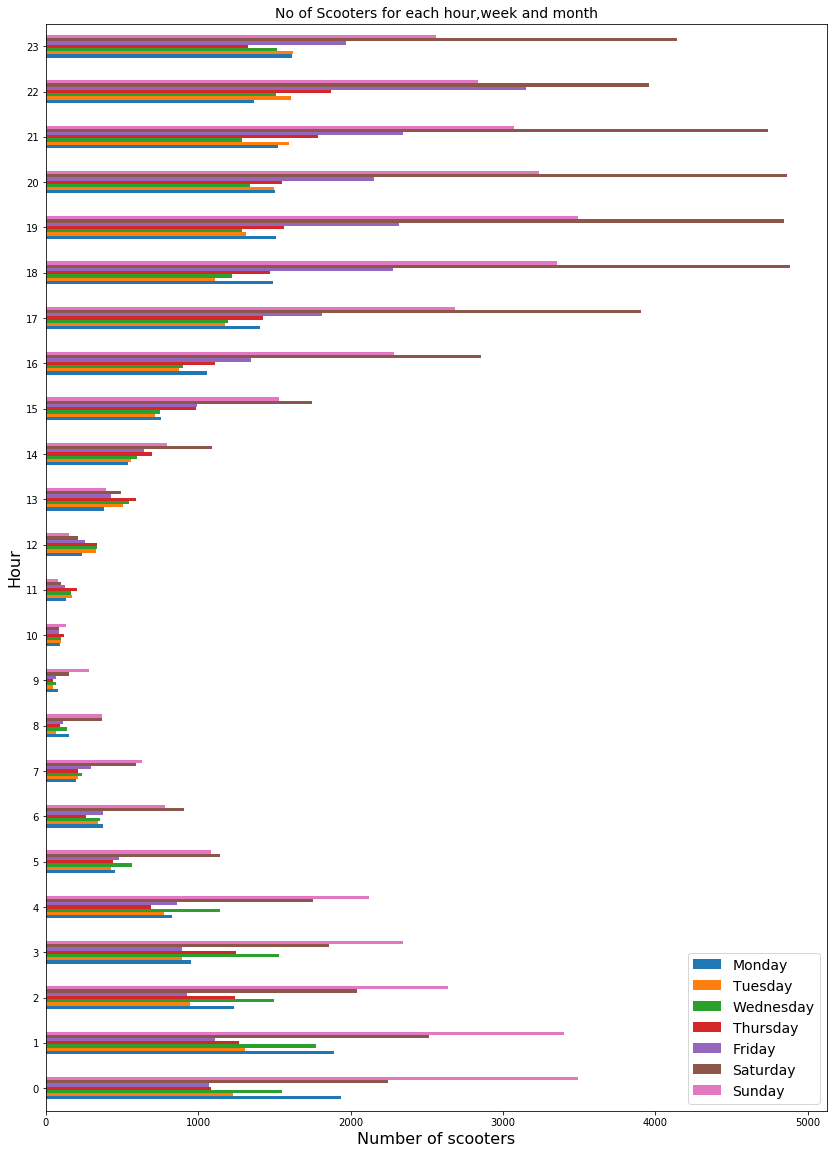

In [20]:
scooters_hour_day =june_trip.groupby([june_trip['pubTimeStamp'].dt.hour.rename('hour'),june_trip['pubTimeStamp'].dt.dayofweek.rename('day')]).count().pubTimeStamp

scooters_hour_day.unstack().plot(kind='barh', figsize=(14,20))

# title and x,y labels
plt.legend(labels=[calendar.day_name[x] for x in range(0,7)],fontsize=14)
plt.title('No of Scooters for each hour,week and month',fontsize=14)
plt.xlabel('Number of scooters',fontsize=16)
plt.ylabel('Hour',fontsize=16);

In [78]:
promise_zones = gpd.read_file('MDHA_Promise_Zones/Export_Output_5.shp')
promise_zones

,OBJECTID,ZONE_ID,SHAPE_STAr,SHAPE_STLe,geometry
0,1,1,1.053728e+08,49364.601403,"POLYGON ((1743366.812291667 678044.5425000042,..."
1,2,2,7.670585e+07,45226.018917,"POLYGON ((1738690.545416668 661791.3466666639,..."
2,3,3,2.985488e+08,75207.067487,"POLYGON ((1759602.543750003 668309.8885416687,..."
3,4,4,2.713638e+08,74348.596054,"POLYGON ((1747799.002708331 654974.6122916639,..."
4,5,5,3.928178e+08,106661.712102,"POLYGON ((1737013.743958339 692634.6387500018,..."
5,6,6,9.535996e+07,59256.923574,"POLYGON ((1716935.654166669 667534.4950000048,..."


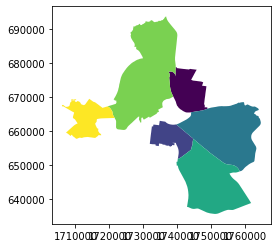

In [79]:
promise_zones.plot(column = "ZONE_ID")

In [80]:
promise_zones.crs

{'init': 'epsg:2274'}

In [81]:
june_trip['geometry'] = june_trip.apply(lambda x:((float(x.endLongitude), float(x.endLatitude))), axis=1)
june_trip.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt,geometry
0,2019-06-01 00:05:46.817,Bird,BRD3572,PoweredSPI1T,4.0,328.084000,2019-06-01,2019-09-10 00:02:18.203333,2019-06-01,2019-09-10 00:06:16.406666,36.164400,-86.78070,36.163600,-86.780200,"[[36.164679,-86.781089],[36.163693,-86.78011],...",2019-06-02 05:30:19.960000,"(-86.7802, 36.1636)"
1,2019-06-01 00:05:46.817,Bird,BRD3571,Powered2I3MS,5.0,4921.260000,2019-06-01,2019-09-10 00:02:44.803333,2019-06-01,2019-09-10 00:07:28.286666,36.175300,-86.79430,36.175300,-86.794300,"[[36.175367,-86.794232],[36.175367,-86.794232]...",2019-06-02 05:30:19.927000,"(-86.7943, 36.1753)"
2,2019-06-01 00:09:54.000,Gotcha,GOT1,Powered327,12.0,12.426575,2019-06-01,2019-09-10 00:09:56.000000,2019-06-01,2019-09-10 00:21:56.000000,36.161501,-86.77601,36.152529,-86.783742,"[[""36.16149"",""-86.77605000000001""]]",2019-06-06 22:23:08.673000,"(-86.78374233333334, 36.15252916666667)"
3,2019-06-01 00:10:46.957,Bird,BRD3610,Powered8U1A6,2.0,0.000000,2019-06-01,2019-09-10 00:10:31.163333,2019-06-01,2019-09-10 00:12:02.773333,36.164000,-86.78070,36.163100,-86.779700,"[[36.163168,-86.779639]]",2019-06-02 05:30:20.283000,"(-86.7797, 36.1631)"
4,2019-06-01 00:10:46.957,Bird,BRD3612,PoweredSPI1T,5.0,656.168000,2019-06-01,2019-09-10 00:07:21.430000,2019-06-01,2019-09-10 00:12:30.913333,36.165000,-86.77990,36.165900,-86.777800,"[[36.164951,-86.779836],[36.16494,-86.779456],...",2019-06-02 05:30:20.347000,"(-86.7778, 36.1659)"


In [ ]:
##june_trip.crs

In [ ]:
##scooters_geo = gpd.GeoDataFrame(june_trip, crs = promise_zones.crs, geometry = june_trip['geometry'])
##scooters_geo.head

In [ ]:
##zone_scooters = gpd.sjoin(scooters_geo, promise_zones, op = 'within')

In [21]:
scooter_trips=june_trip.iloc[:, 2:4].groupby('sumdID', as_index=False).count()
scooter_trips.head()

,sumdID,tripRecordNum
0,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,39
1,Powered-01a24436-0315-e1bb-7ce0-d081d05dff7d,26
2,Powered-03be23ca-d43b-222f-be54-e44b5b4690df,37
3,Powered-046201fb-6532-1f37-6334-3612fb1e61f7,37
4,Powered-0479bb84-afbd-0426-f1c4-df628542a88c,49


In [22]:
Scooter90 = scooter_trips.loc[scooter_trips['tripRecordNum']>=90]
Scooter90

,sumdID,tripRecordNum
866,Powered23JUWVLLRKZSV,90
914,Powered25PS3VEKPY4BH,109
1053,Powered2JKPJFIDOWM5I,125
1071,Powered2OFHK7WJJGPSG,90
1074,Powered2PIIROGN76GLF,114
...,...,...
6631,PoweredZKXGQSVDO5MSH,114
6646,PoweredZQ7D6YSOBD3N4,92
6650,PoweredZRKDKQ24W2P2X,113
6668,PoweredZVJWKTABQJ25L,102


In [23]:
june90 = june_trip.loc[june_trip['sumdID'].isin(Scooter90.sumdID)]
june90

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
43,2019-06-01 00:25:47.827,Bird,BRD3705,PoweredUNKNOWN,0.0,0.000000,2019-06-01,2019-09-10 00:27:11.406666,2019-06-01,2019-09-10 00:27:21.493333,36.144900,-86.809300,36.144900,-86.809300,[],2019-06-02 05:30:21.813000
47,2019-06-01 00:25:47.827,Bird,BRD3704,PoweredUNKNOWN,0.0,0.000000,2019-06-01,2019-09-10 00:27:29.580000,2019-06-01,2019-09-10 00:27:39.063333,36.144900,-86.809300,36.144900,-86.809300,[],2019-06-02 05:30:21.783000
69,2019-06-01 00:30:47.943,Bird,BRD3737,PoweredUNKNOWN,0.0,0.000000,2019-06-01,2019-09-10 00:32:15.626666,2019-06-01,2019-09-10 00:32:25.553333,36.159000,-86.775700,36.159000,-86.775700,[],2019-06-02 05:30:22.403000
110,2019-06-01 00:40:48.323,Bird,BRD3800,PoweredUNKNOWN,1.0,0.000000,2019-06-01,2019-09-10 00:40:11.770000,2019-06-01,2019-09-10 00:40:50.926666,36.123700,-86.789600,36.123700,-86.789600,[],2019-06-02 05:30:24.033000
114,2019-06-01 00:40:48.323,Bird,BRD3799,PoweredUNKNOWN,0.0,0.000000,2019-06-01,2019-09-10 00:42:33.976666,2019-06-01,2019-09-10 00:42:47.656666,36.177700,-86.750400,36.177700,-86.750400,[],2019-06-02 05:30:24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205596,2019-07-01 00:54:49.490,Lime,LIM784832,PoweredQQOLTIYF2NHPZ,10.0,0.000000,2019-06-30,2019-09-10 23:57:49.000000,2019-07-01,2019-09-10 00:07:39.000000,36.154711,-86.777161,36.151817,-86.789930,"[[36.15471,-86.77716]]",2019-07-02 08:43:37.900000
205597,2019-07-01 00:54:49.497,Lime,LIM784838,PoweredPMQPCKNQXOJ7F,17.0,6963.222878,2019-06-30,2019-09-10 23:54:03.000000,2019-07-01,2019-09-10 00:11:12.000000,36.163467,-86.776316,36.160742,-86.774803,"[[36.16403,-86.77691],[36.16397,-86.77565],[36...",2019-07-02 08:43:38.110000
205600,2019-07-01 00:54:49.503,Lime,LIM784844,Powered6PL5PAQ44POVN,50.0,10293.891302,2019-06-30,2019-09-10 23:24:18.000000,2019-07-01,2019-09-10 00:14:35.000000,36.149520,-86.814160,36.151560,-86.814109,"[[36.14909,-86.81389],[36.14857,-86.81355],[36...",2019-07-02 08:43:38.290000
205604,2019-07-01 00:54:49.603,Lime,LIM784868,PoweredF67WWTXR3ZSGH,23.0,9630.402953,2019-06-30,2019-09-10 23:59:15.000000,2019-07-01,2019-09-10 00:22:53.000000,36.163147,-86.775936,36.159980,-86.776591,"[[36.16315,-86.77594],[36.16304,-86.77603],[36...",2019-07-02 08:43:39.060000


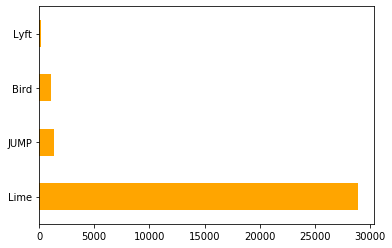

In [24]:
june90.companyName.value_counts().plot(kind='barh',color='orange')

In [25]:
june90.sumdID.value_counts()

Poweredb671ffe4-2bca-5880-98ec-d36f65aa11a2    1308
PoweredUNKNOWN                                 1120
PoweredOQ3DRY64KZBYS                            158
PoweredSQWMJWTIGM6DS                            158
Powered3ZPCHCTLNK2WR                            144
                                               ... 
Powered599092                                    90
PoweredPZ4IIBQOGIDC7                             90
PoweredIIFP7P647BBG7                             90
Powered23JUWVLLRKZSV                             90
PoweredPVIIGJ7XTWBM4                             90
Name: sumdID, Length: 278, dtype: int64

In [82]:
##scooters which has zero trip duration
zerotrip = june_trip.loc[june_trip.tripDuration==0.0]
zerotrip

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt,geometry
43,2019-06-01 00:25:47.827,Bird,BRD3705,PoweredUNKNOWN,0.0,0.000000,2019-06-01,2019-09-10 00:27:11.406666,2019-06-01,2019-09-10 00:27:21.493333,36.144900,-86.809300,36.144900,-86.809300,[],2019-06-02 05:30:21.813000,"(-86.8093, 36.1449)"
47,2019-06-01 00:25:47.827,Bird,BRD3704,PoweredUNKNOWN,0.0,0.000000,2019-06-01,2019-09-10 00:27:29.580000,2019-06-01,2019-09-10 00:27:39.063333,36.144900,-86.809300,36.144900,-86.809300,[],2019-06-02 05:30:21.783000,"(-86.8093, 36.1449)"
69,2019-06-01 00:30:47.943,Bird,BRD3737,PoweredUNKNOWN,0.0,0.000000,2019-06-01,2019-09-10 00:32:15.626666,2019-06-01,2019-09-10 00:32:25.553333,36.159000,-86.775700,36.159000,-86.775700,[],2019-06-02 05:30:22.403000,"(-86.7757, 36.159)"
114,2019-06-01 00:40:48.323,Bird,BRD3799,PoweredUNKNOWN,0.0,0.000000,2019-06-01,2019-09-10 00:42:33.976666,2019-06-01,2019-09-10 00:42:47.656666,36.177700,-86.750400,36.177700,-86.750400,[],2019-06-02 05:30:24,"(-86.7504, 36.1777)"
138,2019-06-01 00:45:48.700,Bird,BRD3832,PoweredUNKNOWN,0.0,0.000000,2019-06-01,2019-09-10 00:45:41.023333,2019-06-01,2019-09-10 00:46:00.480000,36.159700,-86.779700,36.159700,-86.779700,[],2019-06-02 05:30:24.260000,"(-86.7797, 36.1597)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205314,2019-06-30 23:47:51.363,Bird,BRD5068,PoweredUNKNOWN,0.0,0.000000,2019-06-30,2019-09-10 23:48:39.456666,2019-06-30,2019-09-10 23:49:09.183333,36.136900,-86.799900,36.136900,-86.799900,[],2019-07-01 05:32:39.470000,"(-86.7999, 36.1369)"
205377,2019-06-30 23:54:54.127,Lime,LIM784657,PoweredCRAXFIIF5KUI6,0.0,0.000000,2019-06-30,2019-09-10 22:36:40.000000,2019-06-30,2019-09-10 22:36:49.000000,36.154308,-86.784936,36.154308,-86.784936,"[[36.15431,-86.78494]]",2019-07-01 08:04:05.010000,"(-86.784936, 36.154308)"
205409,2019-06-30 23:54:54.217,Lime,LIM784690,PoweredNA5MPFDXF4BA7,0.0,41.860007,2019-06-30,2019-09-10 22:52:41.000000,2019-06-30,2019-09-10 22:52:50.000000,36.134761,-86.789004,36.134740,-86.789138,"[[36.13476,-86.789],[36.13474,-86.78914]]",2019-07-01 08:04:06.413000,"(-86.789138, 36.13474)"
205441,2019-06-30 23:54:54.283,Lime,LIM784722,PoweredAK442HUNLJ36S,0.0,0.000000,2019-06-30,2019-09-10 23:08:19.000000,2019-06-30,2019-09-10 23:08:32.000000,36.156200,-86.773790,36.156200,-86.773790,"[[36.1562,-86.77379]]",2019-07-01 08:04:07.430000,"(-86.77379, 36.1562)"


In [27]:
zerotrip.sumdID.value_counts()

PoweredUNKNOWN    806
PoweredQ9SF3        4
PoweredQQ5HX        4
PoweredIR6ZE        3
PoweredQKG4E        3
                 ... 
PoweredKYM9H        1
PoweredG36HF        1
Powered1ZGD5        1
PoweredTTTNH        1
PoweredCC4LX        1
Name: sumdID, Length: 640, dtype: int64

In [83]:
zerotrip = zerotrip.loc[zerotrip.sumdID=='PoweredUNKNOWN']
zerotrip

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt,geometry
43,2019-06-01 00:25:47.827,Bird,BRD3705,PoweredUNKNOWN,0.0,0.0,2019-06-01,2019-09-10 00:27:11.406666,2019-06-01,2019-09-10 00:27:21.493333,36.1449,-86.8093,36.1449,-86.8093,[],2019-06-02 05:30:21.813000,"(-86.8093, 36.1449)"
47,2019-06-01 00:25:47.827,Bird,BRD3704,PoweredUNKNOWN,0.0,0.0,2019-06-01,2019-09-10 00:27:29.580000,2019-06-01,2019-09-10 00:27:39.063333,36.1449,-86.8093,36.1449,-86.8093,[],2019-06-02 05:30:21.783000,"(-86.8093, 36.1449)"
69,2019-06-01 00:30:47.943,Bird,BRD3737,PoweredUNKNOWN,0.0,0.0,2019-06-01,2019-09-10 00:32:15.626666,2019-06-01,2019-09-10 00:32:25.553333,36.1590,-86.7757,36.1590,-86.7757,[],2019-06-02 05:30:22.403000,"(-86.7757, 36.159)"
114,2019-06-01 00:40:48.323,Bird,BRD3799,PoweredUNKNOWN,0.0,0.0,2019-06-01,2019-09-10 00:42:33.976666,2019-06-01,2019-09-10 00:42:47.656666,36.1777,-86.7504,36.1777,-86.7504,[],2019-06-02 05:30:24,"(-86.7504, 36.1777)"
138,2019-06-01 00:45:48.700,Bird,BRD3832,PoweredUNKNOWN,0.0,0.0,2019-06-01,2019-09-10 00:45:41.023333,2019-06-01,2019-09-10 00:46:00.480000,36.1597,-86.7797,36.1597,-86.7797,[],2019-06-02 05:30:24.260000,"(-86.7797, 36.1597)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201951,2019-06-30 17:47:34.893,Bird,BRD1717,PoweredUNKNOWN,0.0,0.0,2019-06-30,2019-09-10 17:48:13.536666,2019-06-30,2019-09-10 17:48:29.166666,36.1603,-86.7750,36.1603,-86.7750,[],2019-07-01 05:31:53.453000,"(-86.775, 36.1603)"
202850,2019-06-30 19:12:38.750,Bird,BRD2521,PoweredUNKNOWN,0.0,0.0,2019-06-30,2019-09-10 19:13:12.006666,2019-06-30,2019-09-10 19:13:14.243333,36.1584,-86.7681,36.1584,-86.7681,[],2019-07-01 05:32:04.727000,"(-86.7681, 36.1584)"
203688,2019-06-30 20:42:42.467,Bird,BRD3417,PoweredUNKNOWN,0.0,0.0,2019-06-30,2019-09-10 20:42:52.810000,2019-06-30,2019-09-10 20:43:15.723333,36.1459,-86.8120,36.1459,-86.8120,[],2019-07-01 05:32:17.493000,"(-86.812, 36.1459)"
204995,2019-06-30 22:57:49.077,Bird,BRD4605,PoweredUNKNOWN,0.0,0.0,2019-06-30,2019-09-10 22:57:58.000000,2019-06-30,2019-09-10 22:58:20.966666,36.1559,-86.7743,36.1559,-86.7743,[],2019-07-01 05:32:33.680000,"(-86.7743, 36.1559)"


In [29]:
zerotrip.companyName.value_counts()

Bird    806
Name: companyName, dtype: int64

In [56]:
zerotrip.tripDuration.value_counts()

0.0    806
Name: tripDuration, dtype: int64

In [57]:
zerotrip.tripDistance.value_counts()

0.000       802
5905.512      1
656.168       1
1968.504      1
1312.336      1
Name: tripDistance, dtype: int64

In [84]:
zerotrip.loc[zerotrip.tripDistance==0.00]

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt,geometry
43,2019-06-01 00:25:47.827,Bird,BRD3705,PoweredUNKNOWN,0.0,0.0,2019-06-01,2019-09-10 00:27:11.406666,2019-06-01,2019-09-10 00:27:21.493333,36.1449,-86.8093,36.1449,-86.8093,[],2019-06-02 05:30:21.813000,"(-86.8093, 36.1449)"
47,2019-06-01 00:25:47.827,Bird,BRD3704,PoweredUNKNOWN,0.0,0.0,2019-06-01,2019-09-10 00:27:29.580000,2019-06-01,2019-09-10 00:27:39.063333,36.1449,-86.8093,36.1449,-86.8093,[],2019-06-02 05:30:21.783000,"(-86.8093, 36.1449)"
69,2019-06-01 00:30:47.943,Bird,BRD3737,PoweredUNKNOWN,0.0,0.0,2019-06-01,2019-09-10 00:32:15.626666,2019-06-01,2019-09-10 00:32:25.553333,36.1590,-86.7757,36.1590,-86.7757,[],2019-06-02 05:30:22.403000,"(-86.7757, 36.159)"
114,2019-06-01 00:40:48.323,Bird,BRD3799,PoweredUNKNOWN,0.0,0.0,2019-06-01,2019-09-10 00:42:33.976666,2019-06-01,2019-09-10 00:42:47.656666,36.1777,-86.7504,36.1777,-86.7504,[],2019-06-02 05:30:24,"(-86.7504, 36.1777)"
138,2019-06-01 00:45:48.700,Bird,BRD3832,PoweredUNKNOWN,0.0,0.0,2019-06-01,2019-09-10 00:45:41.023333,2019-06-01,2019-09-10 00:46:00.480000,36.1597,-86.7797,36.1597,-86.7797,[],2019-06-02 05:30:24.260000,"(-86.7797, 36.1597)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201951,2019-06-30 17:47:34.893,Bird,BRD1717,PoweredUNKNOWN,0.0,0.0,2019-06-30,2019-09-10 17:48:13.536666,2019-06-30,2019-09-10 17:48:29.166666,36.1603,-86.7750,36.1603,-86.7750,[],2019-07-01 05:31:53.453000,"(-86.775, 36.1603)"
202850,2019-06-30 19:12:38.750,Bird,BRD2521,PoweredUNKNOWN,0.0,0.0,2019-06-30,2019-09-10 19:13:12.006666,2019-06-30,2019-09-10 19:13:14.243333,36.1584,-86.7681,36.1584,-86.7681,[],2019-07-01 05:32:04.727000,"(-86.7681, 36.1584)"
203688,2019-06-30 20:42:42.467,Bird,BRD3417,PoweredUNKNOWN,0.0,0.0,2019-06-30,2019-09-10 20:42:52.810000,2019-06-30,2019-09-10 20:43:15.723333,36.1459,-86.8120,36.1459,-86.8120,[],2019-07-01 05:32:17.493000,"(-86.812, 36.1459)"
204995,2019-06-30 22:57:49.077,Bird,BRD4605,PoweredUNKNOWN,0.0,0.0,2019-06-30,2019-09-10 22:57:58.000000,2019-06-30,2019-09-10 22:58:20.966666,36.1559,-86.7743,36.1559,-86.7743,[],2019-07-01 05:32:33.680000,"(-86.7743, 36.1559)"


In [85]:
zerotrip.groupby(['tripDuration','geometry']).size()

tripDuration  geometry           
0.0           (-86.8201, 36.152)     1
              (-86.8196, 36.142)     1
              (-86.8157, 36.1503)    1
              (-86.8155, 36.1514)    1
              (-86.8152, 36.1506)    1
                                    ..
              (-86.75, 36.1777)      1
              (-86.7499, 36.1781)    1
              (-86.7476, 36.1772)    1
              (-86.7458, 36.178)     1
              (-86.7444, 36.1929)    1
Length: 714, dtype: int64

In [61]:
zerotrip.loc[zerotrip['tripDistance'].isin([5905.512,656.168,1968.504,1312.336])]

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
10828,2019-06-01 23:01:51.977,Bird,BRD5071,PoweredUNKNOWN,0.0,5905.512,2019-06-01,2019-09-10 23:03:04.770000,2019-06-01,2019-09-10 23:03:18.260000,36.1630,-86.7803,36.1630,-86.7803,[],2019-06-02 05:32:05.013000
51699,2019-06-07 19:58:15.613,Bird,BRD1670,PoweredUNKNOWN,0.0,1312.336,2019-06-07,2019-09-10 19:59:27.046666,2019-06-07,2019-09-10 19:59:43.540000,36.1751,-86.7834,36.1750,-86.7834,[],2019-06-08 05:31:19.667000
67827,2019-06-09 00:34:34.613,Bird,BRD8916,PoweredUNKNOWN,0.0,656.168,2019-06-09,2019-09-10 00:36:14.520000,2019-06-09,2019-09-10 00:36:24.543333,36.1527,-86.8048,36.1526,-86.8047,[],2019-06-10 05:30:21.133000
195320,2019-06-29 20:11:36.807,Bird,BRD4404,PoweredUNKNOWN,0.0,1968.504,2019-06-29,2019-09-10 20:12:28.596666,2019-06-29,2019-09-10 20:12:45.816666,36.1606,-86.7772,36.1606,-86.7772,[],2019-06-30 05:32:03.647000


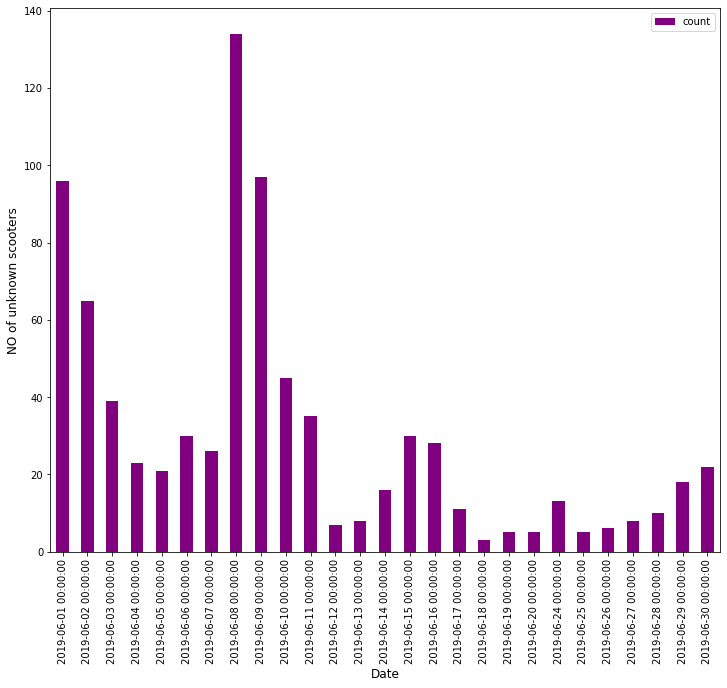

In [68]:
zerotrip.groupby('startDate').sumdID.agg(['count']).plot(kind = 'bar',color='purple',figsize=(12,10))
plt.xlabel('Date',fontsize=12)
plt.ylabel('NO of unknown scooters',fontsize=12);


In [86]:
# scooter_map= folium.Map(location=[36.159485,-86.779553], zoom_start=12)
# # Instantiate a mark cluster object for the scooters
# scooter = plugins.MarkerCluster().add_to(scooter_map)
# # Display scooters for each hour
# for lat, lng, label in zip(zerotrip.startLatitude, zerotrip.startLongitude, zerotrip.startDate.dt.day):
#    if label!='0':
#        folium.Marker(
#            location=[lat, lng],
#            icon=None,
#            popup=label,).add_to(scooter)
# # Display map
# scooter_map

In [89]:
m = folium.Map(location=[36.159485,-86.779553], zoom_start=12)
for _, row in zerotrip.iterrows():
   folium.CircleMarker([row['startLatitude'], row['startLongitude']],
                       #radius=15,
                       fill_color="#3db7e4", # divvy color
                      ).add_to(m)
   folium.CircleMarker([row['endLatitude'], row['endLongitude']],
                       #radius=15,
                       fill_color="black", # divvy color
                      ).add_to(m)
   folium.PolyLine([[row['startLatitude'], row['startLongitude']],
                    [row['endLatitude'], row['endLongitude']]]).add_to(m)
m